# Ejercicio 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Distribuciones - Funciones y Poblaciones

Al momento de trabajar numéricamente con distribuciones de probabilidad hay dos maneras de hacerlo.

La primera trabaja directamente con la función. En ese caso solamente necesitamos generar arrays con el rango y luego usar la función para graficarla y manipular sus valores.

El ejemplo más sencillo es el de la distribución uniforme en el rango 0,1.

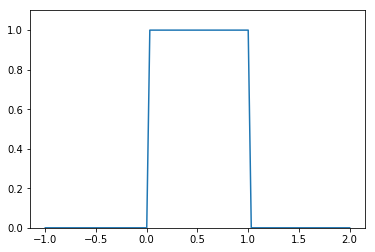

In [2]:
x = np.linspace(-1,2, 100) # generamos un rango de valores en x

distro = np.ones(len(x)) # construimos la distribucion 
distro[x<=0] = 0
distro[x>1] = 0

l=plt.plot(x, distro) # y la graficamos
_=plt.ylim(0,1.1)

Otra manera en la que vamos a trabajar distribuciones de probabilidad es generando arreglos de elementos que sigan esa distribución.

Por ejemplo, eso es lo que hacemos cuando generamos una lista de puntos con la función np.random.uniform. Para verificar que los puntos siguen la distribución deseada podemos hacer un histograma con la palabra clave density=True para que la integral del histograma queda normalizada a uno.

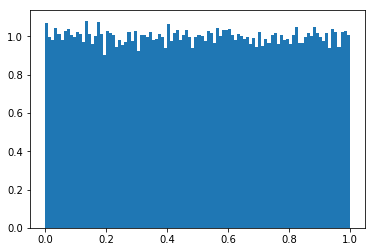

In [3]:
l = np.random.uniform(size=100000) # generamos 100 mil elementos
_ = plt.hist(l, bins=100, density=True) # el histograma tiene 100 intervalos

En este caso podemos verificar que la función de distribución y el histograma concuerdan al graficarlos juntos

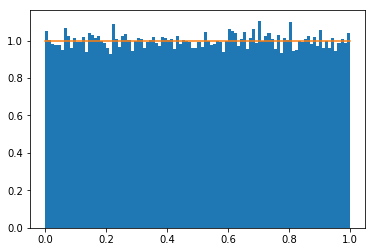

In [4]:
l = np.random.uniform(size=100000)
_ = plt.hist(l, bins=100, density=True)

x = np.linspace(l.min(),l.max(), 100)
distro = np.ones(len(x))
plt.plot(x, distro)

Podemos hacer el mismo ejercicio para otras distribuciones como la Gaussiana o normal

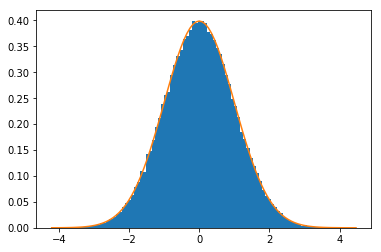

In [5]:
l = np.random.normal(size=100000) # generamos puntos
_ = plt.hist(l, bins=100, density=True) #hacemos su histograma

x = np.linspace(l.min(),l.max(), 100) 
sigma = 1.0
distro = (1.0/np.sqrt(2.0*np.pi*sigma**2)) * np.exp(-(x**2)/(2.0*sigma**2))
plt.plot(x, distro) # comparamos la funcion de distribucion por comparacion

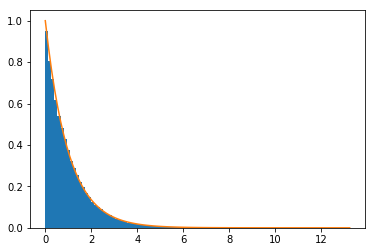

In [6]:
l = np.random.exponential(size=100000)
_ = plt.hist(l, bins=100, density=True)

x = np.linspace(l.min(),l.max(), 100)
distro = np.exp(-x)
plt.plot(x, distro)

## Ejercicio de calentamiento
Genere un arreglo de 100000 puntos con valores entre 0 y 1 que al hacer su histograma siga la distribucion de probabilidad descrita por la siguiente figura.

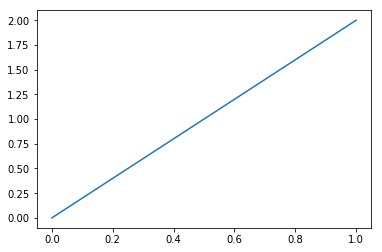

In [7]:
x = np.linspace(0,1, 100)
distro = 2*x
plt.plot(x, distro)

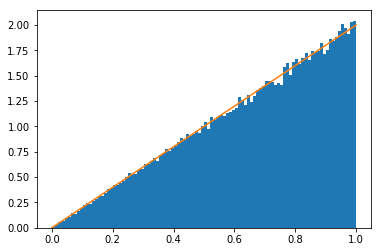

In [8]:
x = np.linspace(0,1, 100)
distro = 2*x

l = np.random.uniform(size=100000)
#sqrt(2u/a)
cum= np.sqrt(l)
plt.hist(cum,bins=100,density=True)
plt.plot(x, distro)
plt.show()

## Segunda parte Ejercicio 

Imagine que está caminando por el amazonas junto a un compañero suyo que desea estudiar una tribu Indigena, si por alguna casualidad usted se encuentra con 2 personas de esta tribu. Imagine que de alguna forma su compañero logra comunicarse con estas personas y sabe que la persona que tiene más edad tiene 40 años.

Determine entonces la distribución de probabilidades de que una persona en esta tribu tenga una edad máxima posible dado los datos.

In [63]:
import numpy as np
import matplotlib.pylab as plt
import random

n_personas_obs = 2
edad_maxima_obs = 40

edad_final = np.arange(0, 500)
n_edades = len(edad_final) # toma 150 elementos
n_intentos_por_edad = 5000

lista_edades_final = []
for i in range(n_edades):
    n_in = 0 
    for j in range(n_intentos_por_edad):
        a = np.int_(np.random.uniform(low=0, 
                                      high=edad_final[i], 
                                      size=n_personas_obs))
        if(a.max()==edad_maxima_obs):
            lista_edades_final.append(edad_final[i])

In [64]:
def max_prob(p_a, pdf_p_a):
    ii = np.argmax(pdf_p_a)
    return p_a[ii]

In [65]:
def mean(p_a, pdf_p_a):
    return np.trapz(pdf_p_a*p_a, p_a)

In [66]:
def sigma(p_a, pdf_p_a):
    m = mean(p_a, pdf_p_a)
    s = np.trapz(pdf_p_a*p_a*p_a, p_a)
    return np.sqrt(s - m**2)

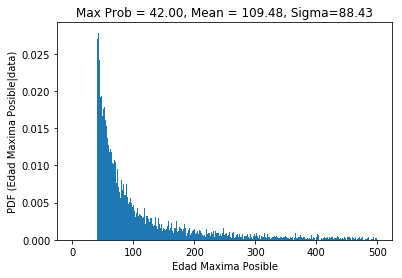

In [67]:
distro, bins,_ = plt.hist(lista_edades_final, bins=edad_final, density=True)

mp = max_prob(bins[:-1], distro)
m = mean(bins[:-1], distro)
sig = sigma(bins[:-1], distro)
values = 'Max Prob = {:.2f}, Mean = {:.2f}, Sigma={:.2f}'.format(mp, m, sig)
plt.title(values)
plt.xlabel('Edad Maxima Posible')
plt.ylabel('PDF (Edad Maxima Posible|data)')
plt.show()
#plt.savefig('posterior_edad_maxima.pdf')

Una forma alterna de solucionar esto es hacer uso de una función para así sistematizar estas rutinas.

In [68]:
### P(edadmax(muerte)|encontramos 2 personas y la edadmax = 40)
def distribucion_edad(N_personas_obs, Edad_max,maximum):
    
    edad_final = np.arange(1, maximum+1) # definimos las edades que queremos estudiar
    n_edades = len(edad_final) 
    n_intentos_por_edad = 5000 #definimos cuantas muestras vamos a tomar para cada edad 
    aparicion = np.array([])
    
    for Emax in range(1,n_edades+1):
        aux=0
        for poblacion in range(n_intentos_por_edad):
            
            Pob = np.linspace(1,Emax,Emax)
            #muestra = np.int_(np.random.uniform(low=0, high=edad_final[Emax], size=N_personas_obs))
            muestra = np.random.choice(Pob,N_personas_obs)

            if np.max(muestra) == Edad_max:
                aux += 1
                #aparicion = np.append(aparicion,edad_final[i])
        aparicion = np.append(aparicion,aux)
    return aparicion

In [77]:
def plotting_results(aparicion,Edad_max,maximum):   
    edad = np.linspace(1,maximum,maximum)
    suma = np.sum(aparicion)
    Prob= aparicion/(sum(aparicion))
    valmax=np.argmax(Prob)
    maximo= edad[valmax]
    Esperado= np.sum(Prob*edad)
    Esperadox2= np.sum(Prob*(edad**2))
    standard = np.sqrt(Esperadox2-(Esperado)**2)
    plt.title("Max = "+str(round(maximo,5))+ "\n" +r"$E(x)$= "+str(round(Esperado,5))+ "\n" +r"$\sigma$= "+str(round(standard,5)))
    #plt.xlim(Edad_max-5,100+5)
    plt.bar(edad,Prob,color="firebrick")
    plt.xlabel(r'$Edad$')
    plt.ylabel(r'$P(Edad\ Max\ de\ muerte|Num_{personas},Edad_{encontrada})$')
    #plt.savefig("Edades.pdf")
    plt.show()

In [61]:
aparicion=distribucion_edad(2,40,500)

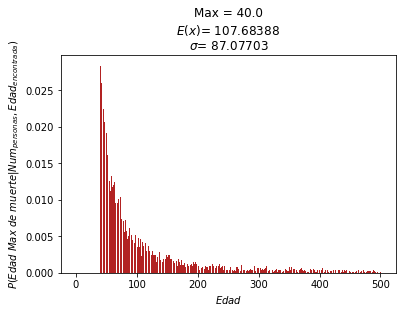

In [78]:
plotting_results(aparicion,40,500)

100